In [5]:
import itertools

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA


In [2]:
def principal_component_analysis(x_train):

    """
    Principal Component Analysis (PCA) identifies the combination
    of attributes (principal components, or directions in the feature space)
    that account for the most variance in the data.

    Let's calculate the 2 first principal components of the training data,
    and then create a scatter plot visualizing the training data examples
    projected on the calculated components.
    """

    # Extract the variable to be predicted
    y_train = x_train["TARGET"]
    x_train = x_train.drop(labels="TARGET", axis=1)
    classes = np.sort(np.unique(y_train))
    labels = ["Satisfied customer", "Unsatisfied customer"]

    # Normalize each feature to unit norm (vector length)
    x_train_normalized = normalize(x_train, axis=0)
    
    # Run PCA
    pca = PCA(n_components=2)
    x_train_projected = pca.fit_transform(x_train_normalized)

    # Visualize
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(1, 1, 1)
    colors = [(0.0, 0.63, 0.69), 'black']
    markers = ["o", "D"]
    for class_ix, marker, color, label in zip(
            classes, markers, colors, labels):
        ax.scatter(x_train_projected[np.where(y_train == class_ix), 0],
                   x_train_projected[np.where(y_train == class_ix), 1],
                   marker=marker, color=color, edgecolor='whitesmoke',
                   linewidth='1', alpha=0.9, label=label)
        ax.legend(loc='best')
    plt.title(
        "Scatter plot of the training data examples projected on the "
        "2 first principal components")
    plt.xlabel("Principal axis 1 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[0] * 100.0))
    plt.ylabel("Principal axis 2 - Explains %.1f %% of the variance" % (
        pca.explained_variance_ratio_[1] * 100.0))
    plt.show()

    plt.savefig("pca.pdf", format='pdf')
    plt.savefig("pca.png", format='png')


In [3]:
def remove_feat_constants(data_frame):
    # Remove feature vectors containing one unique value,
    # because such features do not have predictive value.
    print("")
    print("Deleting zero variance features...")
    # Let's get the zero variance features by fitting VarianceThreshold
    # selector to the data, but let's not transform the data with
    # the selector because it will also transform our Pandas data frame into
    # NumPy array and we would like to keep the Pandas data frame. Therefore,
    # let's delete the zero variance features manually.
    n_features_originally = data_frame.shape[1]
    selector = VarianceThreshold()
    selector.fit(data_frame)
    # Get the indices of zero variance feats
    feat_ix_keep = selector.get_support(indices=True)
    orig_feat_ix = np.arange(data_frame.columns.size)
    feat_ix_delete = np.delete(orig_feat_ix, feat_ix_keep)
    # Delete zero variance feats from the original pandas data frame
    data_frame = data_frame.drop(labels=data_frame.columns[feat_ix_delete],
                                 axis=1)
    # Print info
    n_features_deleted = feat_ix_delete.size
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame

In [4]:
def remove_feat_identicals(data_frame):
    # Find feature vectors having the same values in the same order and
    # remove all but one of those redundant features.
    print("")
    print("Deleting identical features...")
    n_features_originally = data_frame.shape[1]
    # Find the names of identical features by going through all the
    # combinations of features (each pair is compared only once).
    feat_names_delete = []
    for feat_1, feat_2 in itertools.combinations(
            iterable=data_frame.columns, r=2):
        if np.array_equal(data_frame[feat_1], data_frame[feat_2]):
            feat_names_delete.append(feat_2)
    feat_names_delete = np.unique(feat_names_delete)
    # Delete the identical features
    data_frame = data_frame.drop(labels=feat_names_delete, axis=1)
    n_features_deleted = len(feat_names_delete)
    print("  - Deleted %s / %s features (~= %.1f %%)" % (
        n_features_deleted, n_features_originally,
        100.0 * (np.float(n_features_deleted) / n_features_originally)))
    return data_frame

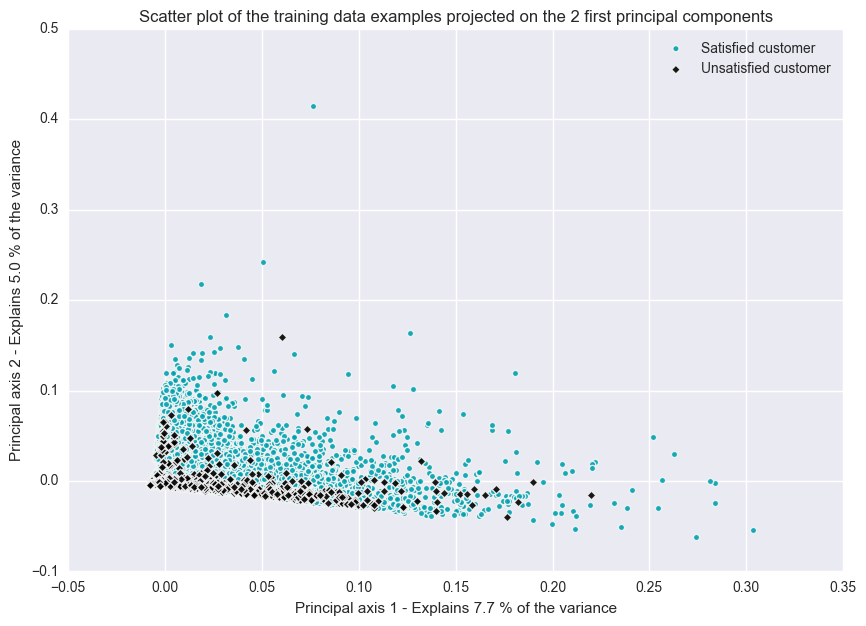

In [5]:
if __name__ == "__main__":
    x_train = pd.read_csv(filepath_or_buffer="/Users/jyothi/Desktop/santender/train.csv",
                          index_col=0, sep=',')
    #x_train = remove_feat_constants(x_train)
    #x_train = remove_feat_identicals(x_train)
    principal_component_analysis(x_train)

In [ ]:
from sklearn import cross_validation
import sklearn
from sklearn.metrics import roc_auc_score

In [22]:
x_train = pd.read_csv(filepath_or_buffer="/Users/jyothi/Desktop/santender/train.csv",
                          index_col=0, sep=',')
y_train = x_train["TARGET"]
x_train = x_train.drop(labels="TARGET", axis=1)


In [52]:
x_train_normalized = normalize(x_train, axis=0)
     # Run PCA
pca = PCA(n_components=100)
x = pca.fit_transform(x_train_normalized)
#x_train_projected = pca.fit_transform(x_train_normalized)

In [25]:
X_train, X_test, y_train , y_test =  cross_validation.train_test_split(x[:,99], y_train , random_state=1301,  train_size=.8)
# Load the packages for modeling
from sklearn.grid_search import GridSearchCV
import sklearn
import xgboost as xgb
import matplotlib.pyplot as plt

In [57]:
my_model = PCA(n_components=100)
my_model.fit_transform(x_train_normalized)

print (my_model.explained_variance_ratio_.cumsum())

[ 0.07747673  0.1270827   0.16549501  0.20132795  0.23622821  0.26763259
  0.29766429  0.32748342  0.35526986  0.38251802  0.40616656  0.42889001
  0.45081362  0.47222051  0.49091044  0.50945126  0.52672598  0.54082376
  0.55433065  0.56771874  0.5808159   0.59343838  0.60516584  0.61659214
  0.6277339   0.63856503  0.64919305  0.65943102  0.66943493  0.67927157
  0.68866842  0.6978006   0.70640633  0.71485283  0.72270725  0.72999425
  0.73704719  0.74405246  0.75075886  0.75737474  0.76388136  0.77028684
  0.77660044  0.78277681  0.78886932  0.79493128  0.80086805  0.80672637
  0.81216809  0.81749442  0.8225558   0.82716197  0.83170426  0.83604074
  0.84018444  0.84431663  0.84836129  0.8522971   0.85620557  0.85997068
  0.86363442  0.86717037  0.87055276  0.8738589   0.87708146  0.88025134
  0.88336319  0.88639602  0.88941319  0.89229422  0.8950812   0.89779334
  0.90045043  0.90305422  0.90558751  0.90808467  0.91050037  0.91285585
  0.9151738   0.91745304  0.91970101  0.92192578  0

In [36]:
x_df = pd.DataFrame(X_train)
x_df.shape

(60816, 1)

In [28]:
y_train.shape


(60816,)

In [46]:
test_x_df = pd.DataFrame(X_test)

In [43]:
# Define a new XGBoost Classifier with default parameters
xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=5, min_child_weight=1,
                           gamma=0, subsample=0.8, colsample_bytree=1, objective='binary:logistic',
                           nthread=4,seed=10)

In [44]:
xgb_clf.fit(x_df,y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=100, nthread=4,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=10, silent=True, subsample=0.8)

In [47]:
predicted_proba = xgb_clf.predict_proba(test_x_df)

In [49]:
from sklearn.metrics import roc_auc_score
false_positive_rate, true_positive_rate, thresholds = sklearn.metrics.roc_curve(y_test, predicted_proba[:,1])
roc_auc = sklearn.metrics.auc(false_positive_rate, true_positive_rate)

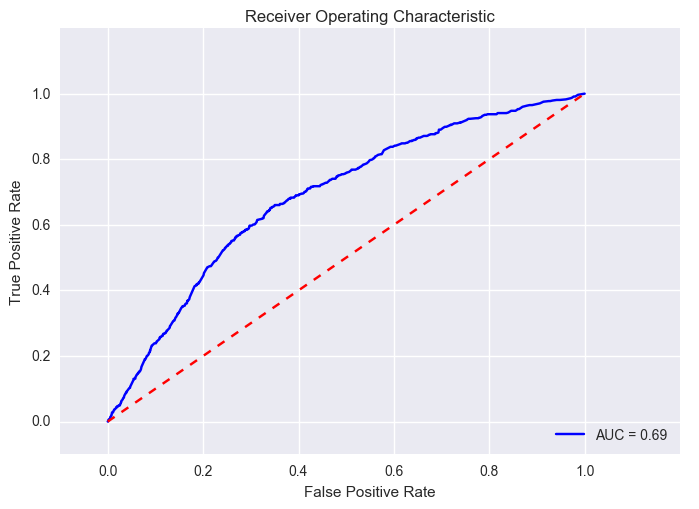

In [50]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## PCA & FEATURE IMPORTANCE TOGETHER with XGBOOST 